In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

We will use the dataset

In [2]:
f=pd.read_csv("EVChargingStationUsage.csv")

C:\Users\33651\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (29,30,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  Ga

In [4]:
# f = f.set_index("User ID")

In [3]:

# valeur_recherchee = '42845.81041'
# nouvelle_valeur = '4/20/2017 19:26'
# f.loc[f['End Date'] == valeur_recherchee, 'End Date'] = nouvelle_valeur

f = f.drop_duplicates()
f['Start Date'] = pd.to_datetime(f['Start Date'], format="%m/%d/%Y %H:%M")
f['Total Duration (hh:mm:ss)'] = pd.to_timedelta(f['Total Duration (hh:mm:ss)'])
f['Charging Time (hh:mm:ss)'] = pd.to_timedelta(f['Charging Time (hh:mm:ss)'])


f['is_weekend'] = f['Start Date'].dt.dayofweek >= 5
# We convert User IDs into numerical data. The errors are replaced by NaN. Then all NaN are removed.
# Doing it for energy is not necessary becaue 
f['User ID'] = pd.to_numeric(f['User ID'], errors='coerce') 
f2 = f.dropna(subset=['User ID'])

dt = f2.drop(['Station Name', 'MAC Address', 'End Time Zone', 'Transaction Date (Pacific Time)', 'End Date',
             'Org Name','Currency', 'Fee','GHG Savings (kg)','Gasoline Savings (gallons)','Port Type', 'Port Number',
            'Plug Type','Address 1','City','State/Province','Ended By','System S/N','Model Number','County',
             'Driver Postal Code','Start Time Zone', 'EVSE ID','Postal Code', 'Country','Plug In Event Id','Latitude','Longitude'], axis=1)



In [28]:

f


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number,is_weekend
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-29 20:17:00,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,03:03:32,01:54:03,...,USD,0.00,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN,False
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 00:00:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,00:02:06,00:01:54,...,USD,0.00,Customer,4,94301.0,4169.0,NaN,NaN,NaN,True
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 08:16:00,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,04:17:32,04:17:28,...,USD,0.00,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN,True
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 14:51:00,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,02:03:24,02:02:58,...,USD,0.00,Customer,6,94302.0,2545.0,NaN,NaN,NaN,True
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 18:51:00,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,01:11:24,00:43:54,...,USD,0.00,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,2020-12-31 16:39:00,PST,12/31/2020 17:14,PST,12/31/2020 17:16,00:35:44,00:35:18,...,USD,0.42,Plug Out at Vehicle,2369,94301.0,2024201.0,NaN,1.745410e+11,CT4020-HD-GW,False
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 16:48:00,PST,12/31/2020 20:31,PST,12/31/2020 20:32,03:43:01,02:14:04,...,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661.0,Santa Clara County,1.336410e+11,CT4020-HD-GW,False
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,2020-12-31 17:28:00,PST,1/1/2021 10:56,PST,1/1/2021 10:57,17:28:14,05:08:12,...,USD,6.82,Plug Out at Vehicle,455,94306.0,449995.0,Santa Clara County,2.002410e+11,CT4010-HD-GW,False
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 17:49:00,PST,12/31/2020 21:55,PST,12/31/2020 21:56,04:05:34,03:53:42,...,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075.0,Santa Clara County,1.336410e+11,CT4020-HD-GW,False


In [6]:
dt

,Start Date,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),User ID,is_weekend
0,2011-07-29 20:17:00,03:03:32,01:54:03,6.249457,3284.0,False
1,2011-07-30 00:00:00,00:02:06,00:01:54,0.106588,4169.0,True
2,2011-07-30 08:16:00,04:17:32,04:17:28,14.951777,4169.0,True
3,2011-07-30 14:51:00,02:03:24,02:02:58,7.159643,2545.0,True
4,2011-07-30 18:51:00,01:11:24,00:43:54,1.957765,3765.0,True
...,...,...,...,...,...,...
259410,2020-12-31 16:39:00,00:35:44,00:35:18,1.841000,2024201.0,False
259411,2020-12-31 16:48:00,03:43:01,02:14:04,12.744000,242661.0,False
259412,2020-12-31 17:28:00,17:28:14,05:08:12,29.665000,449995.0,False
259413,2020-12-31 17:49:00,04:05:34,03:53:42,11.976000,804075.0,False


In [13]:
dt['Hours Charging'] = dt['Charging Time (hh:mm:ss)'].dt.total_seconds() / 3600
dt['Hours Occupied'] = dt['Total Duration (hh:mm:ss)'].dt.total_seconds() / 3600

dt['mean kW'] = dt['Energy (kWh)']/dt['Hours Charging']
dt['End Charging'] = dt['Start Date']+dt['Charging Time (hh:mm:ss)']

In [8]:
dt

,Start Date,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),User ID,is_weekend,Hours Charging,Hours Occupied,mean kW,End Charging
0,2011-07-29 20:17:00,03:03:32,01:54:03,6.249457,3284.0,False,1.900833,3.058889,3.287746,2011-07-29 22:11:03
1,2011-07-30 00:00:00,00:02:06,00:01:54,0.106588,4169.0,True,0.031667,0.035000,3.365937,2011-07-30 00:01:54
2,2011-07-30 08:16:00,04:17:32,04:17:28,14.951777,4169.0,True,4.291111,4.292222,3.484360,2011-07-30 12:33:28
3,2011-07-30 14:51:00,02:03:24,02:02:58,7.159643,2545.0,True,2.049444,2.056667,3.493456,2011-07-30 16:53:58
4,2011-07-30 18:51:00,01:11:24,00:43:54,1.957765,3765.0,True,0.731667,1.190000,2.675761,2011-07-30 19:34:54
...,...,...,...,...,...,...,...,...,...,...
259410,2020-12-31 16:39:00,00:35:44,00:35:18,1.841000,2024201.0,False,0.588333,0.595556,3.129178,2020-12-31 17:14:18
259411,2020-12-31 16:48:00,03:43:01,02:14:04,12.744000,242661.0,False,2.234444,3.716944,5.703431,2020-12-31 19:02:04
259412,2020-12-31 17:28:00,17:28:14,05:08:12,29.665000,449995.0,False,5.136667,17.470556,5.775146,2020-12-31 22:36:12
259413,2020-12-31 17:49:00,04:05:34,03:53:42,11.976000,804075.0,False,3.895000,4.092778,3.074711,2020-12-31 21:42:42


In [26]:
# I did that because some duration > 24hours
# Hourly occupation by user
grouped=list(set(dt['User ID']))
grouped=np.sort(grouped)
print(len(grouped))


user_occupation = {}
k=0
for g in grouped[0:1000] :
    occupation_per_hour = [0] * 24
    k+=1
    print(k)
    for i in range(len(dt.loc[dt['User ID'] == g, 'Start Date'])):
        start_hour = dt.loc[dt['User ID'] == g, 'Start Date'].iloc[i].hour
        start_minute = dt.loc[dt['User ID'] == g, 'Start Date'].iloc[i].minute
        duration_occupied = dt.loc[dt['User ID'] == g, 'Hours Occupied'].iloc[i]-(1- start_minute/60)

#         If due to duration we do not occupy the charger until the next hour
        if(duration_occupied<=0):
            occupation_per_hour[start_hour] += dt.loc[dt['User ID'] == g, 'Hours Occupied'].iloc[i]
    
        else:
            occupation_per_hour[start_hour] += (1- start_minute/60)
            duration = 1
            while(duration <duration_occupied):
                hour = (start_hour + 1) % 24
                occupation_per_hour[hour] += 1
            
                start_hour = hour
                duration += 1
            end_hour = (start_hour + 1) % 24
            occupation_per_hour[end_hour] += 1 - (duration - duration_occupied) 
    user_occupation[g]= occupation_per_hour 
    
d=pd.DataFrame(user_occupation)
d
                
        
        


    

21420
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
27

,0.0,102.0,107.0,111.0,140.0,151.0,153.0,158.0,161.0,166.0,...,67903.0,68153.0,68393.0,68643.0,68683.0,68753.0,68783.0,68803.0,68833.0,69313.0
0,31.141389,0.000000,0.000000,0.000000,0.000000,0.166389,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,28.830278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,27.018889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,25.894444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,24.331944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,24.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,28.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,37.728611,0.000000,0.000000,0.000000,0.000000,0.325000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000
8,49.465000,0.000000,0.000000,0.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
9,71.124722,0.000000,0.866667,3.733333,0.000000,0.950000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.711389,0.000000,0.000000


In [8]:
dtt=d.transpose()
dtt

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0.0,31.141389,28.830278,27.018889,25.894444,24.331944,24.700,28.033333,37.728611,49.465000,71.124722,...,59.830000,55.246389,50.776389,61.751111,72.087500,95.625278,83.561389,66.628056,45.601389,36.457778
102.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.100000,2.000000,1.968889,1.000000,0.389722,0.000000,0.000000,0.000000,0.000000
107.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.866667,...,1.962778,0.000000,0.000000,0.000000,0.016667,1.966667,2.000000,0.978611,0.000000,0.000000
111.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.850000,3.733333,...,4.276667,2.619444,1.040278,1.083333,3.077222,4.466667,5.000000,2.629167,0.167778,0.000000
140.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.553333,0.000000,0.516667,0.701667,1.000000,2.000000,1.968611,0.255833,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190.0,46.366667,47.000000,47.500000,45.146389,44.916667,42.795,20.189167,7.136944,1.206944,1.150000,...,4.135833,5.183333,10.253333,26.228056,48.032778,62.802500,64.086667,57.380556,51.197778,45.275000
3196.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3204.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.466667,1.000000,1.000000,1.000000,0.119722,0.000000
3206.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.133333,1.000000,1.000000,0.965556,0.000000,0.000000,0.000000,0.000000


In [9]:
dtt.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.344906,2.271650,2.292522,2.264408,2.394867,2.828453,3.748603,4.406889,5.036122,5.557250,...,2.622169,2.479828,2.463814,3.189156,4.254464,4.605733,3.991447,3.355406,2.844642,2.620386
std,15.082506,15.263571,15.576263,15.553987,16.932784,21.240238,31.777140,37.176216,31.713775,30.767963,...,10.073148,10.193122,9.868232,11.402643,13.152772,14.266178,12.753675,12.963315,14.239160,15.017898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.186389,0.000000,0.000000,0.141667,0.792083,0.658333,0.600000,0.111389,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.791667,...,1.000000,1.000000,0.970000,1.000000,1.259167,2.000000,1.728819,1.000000,0.072847,0.000000
max,141.063333,143.221944,146.733333,147.400000,162.238056,207.350278,316.466944,370.344444,294.301389,247.213889,...,73.425278,77.399167,73.663056,78.282222,79.851944,95.625278,83.561389,85.712778,116.674444,137.380000


In [23]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# # Appliquer la normalisation ligne par ligne
# dtt_normalized = dtt.apply(lambda row: scaler.fit_transform(row.values.reshape(-1, 1)).flatten(), axis=1)

# # Optionnel : Renommer les colonnes pour correspondre à l'original
# dtt_normalized = pd.DataFrame(dtt_normalized.tolist(), columns=dtt.columns)
# dtt_normalized

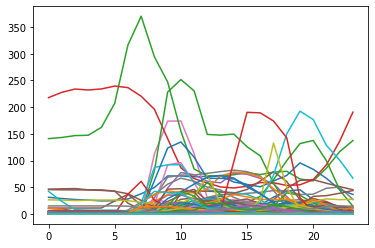

In [27]:
plt.plot(d)

In [1]:
# I did that because some duration > 24hours
grouped=list(set(dt['User ID']))
grouped=np.sort(grouped)
print(len(grouped))


user_occupation = {}
k=0
g=23099981.0
occupation_per_hour = [0] * 24
k+=1
print(k)
for i in range(len(dt.loc[dt['User ID'] == g, 'Start Date'])):
    start_hour = dt.loc[dt['User ID'] == g, 'Start Date'].iloc[i].hour
    start_minute = dt.loc[dt['User ID'] == g, 'Start Date'].iloc[i].minute
    duration_occupied = dt.loc[dt['User ID'] == g, 'Hours Occupied'].iloc[i]-(1- start_minute/60)

    if(duration_occupied<=0):
        occupation_per_hour[start_hour] += dt.loc[dt['User ID'] == g, 'Hours Occupied'].iloc[i]
    
    else:
        occupation_per_hour[start_hour] += (1- start_minute/60)
        duration = 1
        print(duration_occupied)
        print(start_minute)
        while(duration <duration_occupied):
            hour = (start_hour + 1) % 24
            occupation_per_hour[hour] += 1  
            start_hour = hour
            duration += 1
        end_hour = (start_hour + 1) % 24
        occupation_per_hour[end_hour] += 1 - (duration - duration_occupied) 
user_occupation[g]= occupation_per_hour 
    
d=pd.DataFrame(user_occupation)
d
                
        
        


    

NameError: name 'dt' is not defined

In [47]:
user_id_recherche= 23099981.0
a=dt.loc[dt['User ID'] == user_id_recherche, 'Start Date']
a

259263   2020-12-26 16:10:00
Name: Start Date, dtype: datetime64[ns]

In [49]:
b=dt.loc[dt['User ID'] == user_id_recherche, 'Hours Occupied']
b

259263    0.519167
Name: Hours Occupied, dtype: float64

In [29]:
grouped=list(set(dt['User ID']))
grouped=np.sort(grouped)
np.shape(grouped)

(21420,)

In [11]:
dt


,Start Date,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),User ID,is_weekend,Hours Charging,Hours Occupied,mean kW,End Charging
0,2011-07-29 20:17:00,03:03:32,01:54:03,6.249457,3284.0,False,1.900833,3.058889,3.287746,2011-07-29 22:11:03
1,2011-07-30 00:00:00,00:02:06,00:01:54,0.106588,4169.0,True,0.031667,0.035000,3.365937,2011-07-30 00:01:54
2,2011-07-30 08:16:00,04:17:32,04:17:28,14.951777,4169.0,True,4.291111,4.292222,3.484360,2011-07-30 12:33:28
3,2011-07-30 14:51:00,02:03:24,02:02:58,7.159643,2545.0,True,2.049444,2.056667,3.493456,2011-07-30 16:53:58
4,2011-07-30 18:51:00,01:11:24,00:43:54,1.957765,3765.0,True,0.731667,1.190000,2.675761,2011-07-30 19:34:54
...,...,...,...,...,...,...,...,...,...,...
259410,2020-12-31 16:39:00,00:35:44,00:35:18,1.841000,2024201.0,False,0.588333,0.595556,3.129178,2020-12-31 17:14:18
259411,2020-12-31 16:48:00,03:43:01,02:14:04,12.744000,242661.0,False,2.234444,3.716944,5.703431,2020-12-31 19:02:04
259412,2020-12-31 17:28:00,17:28:14,05:08:12,29.665000,449995.0,False,5.136667,17.470556,5.775146,2020-12-31 22:36:12
259413,2020-12-31 17:49:00,04:05:34,03:53:42,11.976000,804075.0,False,3.895000,4.092778,3.074711,2020-12-31 21:42:42


In [26]:
user_id_recherche= 3284
a=dt.loc[dt['User ID'] == user_id_recherche, 'Start Date']
a




0        2011-07-29 20:17:00
9092     2013-02-17 12:58:00
50975    2015-12-07 17:29:00
236447   2019-12-07 16:24:00
Name: Start Date, dtype: datetime64[ns]

In [60]:
user_id_recherche= 707679.0
dt.loc[dt['User ID'] == user_id_recherche, 'Total Duration (hh:mm:ss)']

101296   0 days 03:56:21
115881   0 days 05:23:27
137657   0 days 01:39:52
143378   0 days 00:51:38
144182   0 days 01:16:19
149123   0 days 01:40:10
149949   0 days 00:54:46
159576   1 days 20:00:58
Name: Total Duration (hh:mm:ss), dtype: timedelta64[ns]

In [13]:
from datetime import timedelta
valeur_recherchee = timedelta(hours=24)  # Remplace par la valeur que tu cherches
resultat = dt[dt['Total Duration (hh:mm:ss)'] > valeur_recherchee]
# Afficher les lignes correspondantes
resultat

,Start Date,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),User ID,is_weekend,Hours Charging,mean kW,End Charging,Hours Occupied
155593,2018-03-03 21:28:00,1 days 01:50:24,03:44:15,11.737,671637.0,True,3.737500,3.140334,2018-03-04 01:12:15,25.840000
159576,2018-04-06 20:14:00,1 days 20:00:58,03:28:06,20.421,707679.0,False,3.468333,5.887842,2018-04-06 23:42:06,44.016111
162961,2018-05-05 09:59:00,1 days 08:39:35,02:26:36,13.494,693965.0,True,2.443333,5.522783,2018-05-05 12:25:36,32.659722
168212,2018-06-15 16:22:00,1 days 20:13:50,03:16:18,18.203,693965.0,False,3.271667,5.563831,2018-06-15 19:38:18,44.230556
170383,2018-07-03 21:49:00,1 days 06:26:11,04:01:17,12.055,671637.0,False,4.021389,2.997721,2018-07-04 01:50:17,30.436389
177004,2018-08-28 19:03:00,1 days 15:58:20,01:11:34,3.942,2816681.0,False,1.192778,3.304891,2018-08-28 20:14:34,39.972222
189962,2018-12-15 10:45:00,1 days 02:59:56,01:15:25,4.124,519853.0,True,1.256944,3.280972,2018-12-15 12:00:25,26.998889
190281,2018-12-17 17:04:00,1 days 00:53:28,03:38:51,11.625,671637.0,False,3.647500,3.187114,2018-12-17 20:42:51,24.891111
192901,2019-01-12 12:42:00,1 days 04:11:15,08:04:15,26.266,713785.0,True,8.070833,3.254435,2019-01-12 20:46:15,28.187500
194124,2019-01-22 08:35:00,1 days 01:23:57,03:17:16,17.397,1920451.0,False,3.287778,5.291416,2019-01-22 11:52:16,25.399167


In [106]:
lignes_nan = f[f['User ID'].isna()]
lignes_nan

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number,is_weekend
6154,PALO ALTO CA / BRYANT #1,000D6F0000A20D9E,City of Palo Alto,2012-10-13 07:12:00,PDT,10/13/2012 12:48,PDT,10/13/2012 12:48,05:36:08,01:31:14,...,NaN,0.00,Plug Out at Vehicle,1160,NaN,NaN,NaN,NaN,NaN,True
6164,PALO ALTO CA / BRYANT #1,000D6F0000A20D9E,City of Palo Alto,2012-10-13 18:54:00,PDT,10/13/2012 20:19,PDT,10/13/2012 20:19,01:24:36,01:24:10,...,NaN,0.00,Customer,1162,NaN,NaN,NaN,NaN,NaN,True
6176,PALO ALTO CA / HAMILTON #2,000D:6F00:009E:D39E,City of Palo Alto,2012-10-14 13:38:00,PDT,10/14/2012 14:40,PDT,10/14/2012 14:40,01:01:53,01:01:40,...,USD,0.00,Plug Out at Vehicle,1644,NaN,NaN,NaN,NaN,NaN,True
6178,PALO ALTO CA / HIGH #4,000D6F0000A20F47,City of Palo Alto,2012-10-14 14:52:00,PDT,10/14/2012 16:01,PDT,10/14/2012 16:01,01:08:59,01:08:39,...,NaN,0.00,Plug Out at Vehicle,1350251523,NaN,NaN,NaN,NaN,NaN,True
6181,PALO ALTO CA / BRYANT #1,000D6F0000A20D9E,City of Palo Alto,2012-10-14 18:45:00,PDT,10/14/2012 19:04,PDT,10/14/2012 19:04,00:19:04,00:18:44,...,NaN,0.00,Plug Out at Vehicle,1167,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259379,PALO ALTO CA / MPL #6,0024:B100:0003:4209,City of Palo Alto,2020-12-30 14:32:00,PST,12/30/2020 14:46,PST,12/30/2020 14:48,00:14:41,00:13:52,...,USD,0.32,Plug Out at Vehicle,2075,NaN,NaN,Santa Clara County,1.903410e+11,CT4010-HD-GW,False
259386,PALO ALTO CA / WEBSTER #2,0024:B100:0003:BE6F,City of Palo Alto,2020-12-30 17:57:00,PST,12/30/2020 20:36,PST,12/30/2020 20:38,02:39:12,02:38:40,...,USD,1.71,Plug Out at Vehicle,700,NaN,NaN,Santa Clara County,1.950410e+11,CT4020-HD-GW,False
259396,PALO ALTO CA / BRYANT #6,0024:B100:0002:6B43,City of Palo Alto,2020-12-31 11:15:00,PST,12/31/2020 13:27,PST,12/31/2020 13:28,02:12:09,02:11:49,...,USD,3.13,Plug Out at Vehicle,5761,NaN,NaN,Santa Clara County,1.705410e+11,CT4020-HD-GW,False
259397,PALO ALTO CA / HIGH #3,0024:B100:0002:5939,City of Palo Alto,2020-12-31 11:19:00,PST,12/31/2020 14:08,PST,12/31/2020 14:09,02:48:41,02:48:24,...,USD,4.03,Customer,8177,NaN,NaN,Santa Clara County,1.640410e+11,CT4020-HD,False


In [174]:
day_ts=np.array(dt[dt.date==g]['Start Date'])

AttributeError: 'DataFrame' object has no attribute 'date'